<a href="https://colab.research.google.com/github/Abdulmujeeb-Taiwo/Customer-Segmentation/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
# Importing libraries, this libraries will be usefull for data
#1. Data cleaning
#2. Visualizing
#3. data type converting
#4. and time calculating

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Downloading the data, The data is using wget,
# wget is a command-line utility primarily used in Unix-like operating systemsto download files from the internet. It's a powerful and versatile tool
!wget "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

--2024-12-05 18:24:20--  https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail+ii.zip’

online+retail+ii.zi     [        <=>         ]  43.51M  27.3MB/s    in 1.6s    

2024-12-05 18:24:22 (27.3 MB/s) - ‘online+retail+ii.zip’ saved [45622418]



In [3]:
# Unziping the downloaded file
!unzip "online+retail+ii.zip"

Archive:  online+retail+ii.zip
 extracting: online_retail_II.xlsx   


In [4]:
#Reading data from the unzipped file
#The data contain online retail sales which the file name is "online_retail_II.xlsx"
df = pd.read_excel("online_retail_II.xlsx")

# **Understanding the data**

In [5]:
#Checking the info of the dataset.
#Checking the missing row, and number of null value
#Also data type, memory usage, and others are checked from this block
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
#Here, I'm checking the total null or NA values
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [7]:
#Here also, i'm checking the uniqued value of each columns
df.nunique()

,0
Invoice,28816
StockCode,4632
Description,4681
Quantity,825
InvoiceDate,25296
Price,1606
Customer ID,4383
Country,40


In [8]:
#The invoice has some Cancellation which may stand C and Adjustment which may stand for A
#By Removiing the uncertain invoice, we can have the total sales
df_wc = df[~df['Invoice'].str.contains("C|A", na=False)]

In [9]:
#Looking at the data type of the dataset,
#This will make me to change the wrong data type to it rightful one.
#Also this will help in determine error in columns.
df_wc.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object


In [10]:
#Droping or removing of NA or null values from the dataset.
#Base on the quantity of this dataset, removing all the NA row doesn't affect the dataset.
df_wc.dropna(inplace=True)

<ipython-input-10-8c3445e99181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc.dropna(inplace=True)


In [11]:
#Here, i'm converting the invoice columns to integer
# Advantage of converting it to interget is to be assure that i'm wrking with varied and complete transaction invoice.
df_wc['Invoice'] = df_wc['Invoice'].astype(np.int64)

<ipython-input-11-9a8d15cf3da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc['Invoice'] = df_wc['Invoice'].astype(np.int64)


In [12]:
#To get the total amount of sales for each products that customer purchersed,
# I multiply the qualtity and price

df_wc["Total_amount"] = df_wc["Quantity"] * df_wc["Price"]

<ipython-input-12-0b20468cbc0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc["Total_amount"] = df_wc["Quantity"] * df_wc["Price"]


In [13]:
# Descriptive statistic table
# Here, i see more insight from this table
df_wc.describe().T

,count,mean,min,25%,50%,75%,max,std
Invoice,407695.0,514760.707239,489434.0,502764.0,515303.0,527104.0,538171.0,14101.015474
Quantity,407695.0,13.586686,1.0,2.0,5.0,12.0,19152.0,96.842229
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:46:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407695.0,3.294188,0.0,1.25,1.95,3.75,10953.5,34.756655
Customer ID,407695.0,15368.504107,12346.0,13997.0,15321.0,16812.0,18287.0,1679.7957
Total_amount,407695.0,21.663261,0.0,4.95,11.9,19.5,15818.4,77.147356


# RFM ANALYSIS

**Recency**

In [128]:
#Checking out the time frame of the dataset
#This will help in knowing the starting and ending date of which the data being collected.

print("The Starting Date of Data Collection:", df_wc.InvoiceDate.min())
print("The Ending Date of Data Collection:", df_wc.InvoiceDate.max())

The Starting Date of Data Collection: 2009-12-01 07:45:00
The Ending Date of Data Collection: 2010-12-09 20:01:00


In [129]:
# Here, I'm setting the reference date
# to calculating how recent each customers is

day_after_end_date = dt.datetime(2010,12,11)

In [130]:
#Adding recency to the data
df_wc["recency"] = (day_after_end_date - df_wc.InvoiceDate).dt.days

<ipython-input-130-965fbb6f6547>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc["recency"] = (day_after_end_date - df_wc.InvoiceDate).dt.days


In [131]:
#This table or data frame, "recency_df",  show the recenct days of each customers
recent_df = df_wc.groupby("Customer ID")["recency"].min()

In [132]:
#Showing the descrptive statistic for the recency
recent_df.describe().T

,recency
count,4314.000000
mean,91.269819
std,96.944304
min,1.000000
25%,18.000000
50%,53.000000
75%,136.000000
max,374.000000


In [133]:
#This code determine the inactive of each customers since the first purchase
df_wc.groupby("Customer ID")["recency"].max()

,recency
Customer ID,
12346.0,361
12347.0,40
12348.0,74
12349.0,225
12351.0,11
...,...
18283.0,294
18284.0,67
18285.0,296


In [134]:
#In this block of code i show all the overall transactions or purchases days of each customers
overall_recency = df_wc.groupby(["Customer ID", "Invoice"])["recency"].max()

**Frequency**

In [135]:
#this is the customers frequency code, it depict the count numbers of time from 2009-12-01 07:45:00 to 2010-12-09 20:01:00 a customer purchase
frequency_df = df_wc.groupby("Customer ID")["Invoice"].nunique()

In [136]:
#In this code, i show the numbers of products each customers buy per invoice
df_wc.groupby("Customer ID")["Invoice"].value_counts()

Customer ID  Invoice
12346.0      513774     19
             499763      5
             491725      1
             491742      1
             491744      1
                        ..
18286.0      492250     17
18287.0      508581     54
             523289     19
             534346     10
             523290      2
Name: count, Length: 19215, dtype: int64

In [137]:
invoice_counts = df_wc.groupby("Customer ID")["Invoice"].value_counts()
invoice_counts.loc[invoice_counts.index.get_level_values(1) == 500356]
# Get the invoice counts for each customer
# Filter the invoice counts to only include those where the invoice number is 500356
# This uses the index of the invoice_counts Series, which is a MultiIndex,
# to access the second level (invoice number) and filter accordingly.

,,count
Customer ID,Invoice,
16984.0,500356,270


**Monetary**

In [138]:
#Getting the total amount spent by each customer and saving it as monetary_df
monetary_df = df_wc.groupby("Customer ID")["Total_amount"].sum()

In [139]:
# Descriptive statistic to view
monetary_df.describe()

,Total_amount
count,4314.000000
mean,2047.288659
std,8912.523243
min,0.000000
25%,307.950000
50%,705.550000
75%,1722.802500
max,349164.350000


In [140]:
#Merging the dataframes, recent_df, frequency_df and monetary_df, whcih the are
#recency": "Recency", "Invoice": "Frequency", "Total_amount": "Monetary
rfm_df = pd.merge(recent_df, frequency_df, on="Customer ID", how='inner')
rfm_df = pd.merge(rfm_df, monetary_df, on="Customer ID", how='inner')
rfm_df.rename(columns={"recency": "Recency", "Invoice": "Frequency", "Total_amount": "Monetary"}, inplace=True)

In [141]:
#Here it show the RFM Analysis table for online retail sales
rfm_df

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93
...,...,...,...
18283.0,18,6,641.77
18284.0,67,1,461.68
18285.0,296,1,427.00


# Visualization

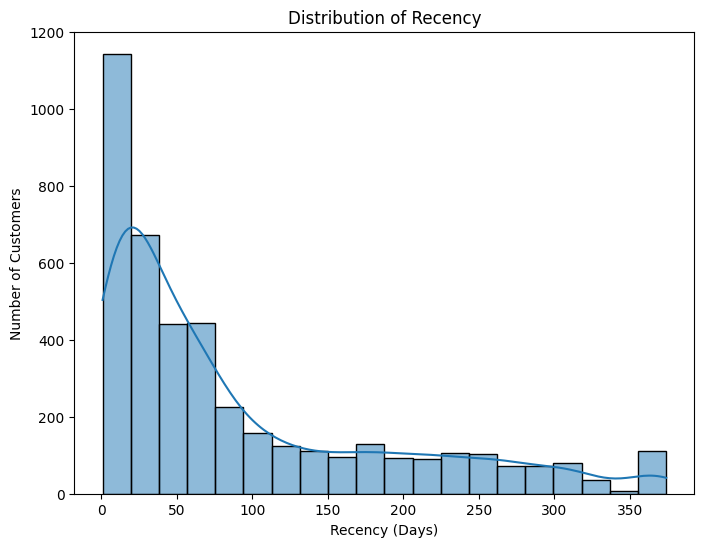

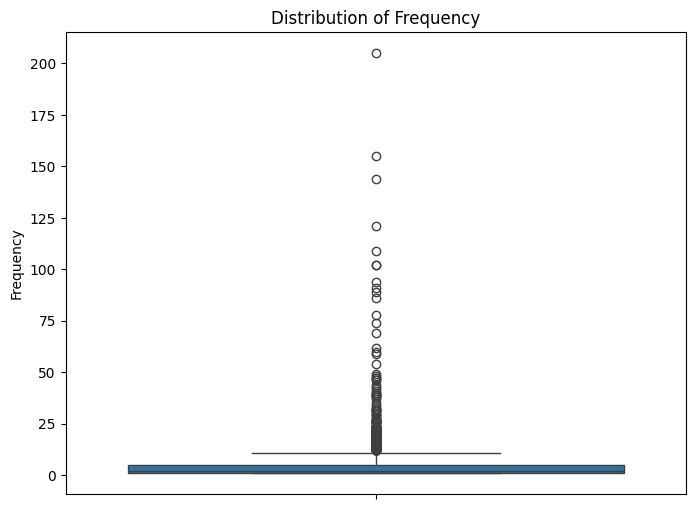

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Recency
plt.figure(figsize=(8, 6))
sns.histplot(rfm_df['Recency'], bins=20, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.show()

# Box plot for Frequency
plt.figure(figsize=(8, 6))
sns.boxplot(y=rfm_df['Frequency'])
plt.title('Distribution of Frequency')
plt.ylabel('Frequency')
plt.show()

# Similar approach for Monetary value distribution

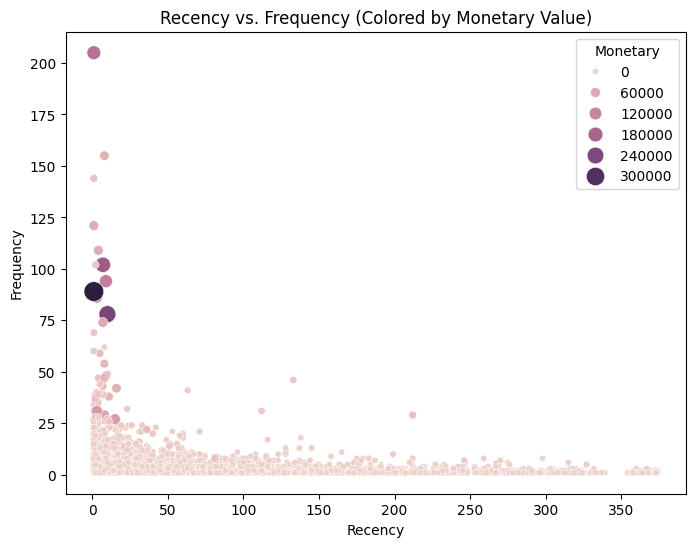

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Frequency', data=rfm_df, hue='Monetary', size='Monetary', sizes=(20, 200))
plt.title('Recency vs. Frequency (Colored by Monetary Value)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

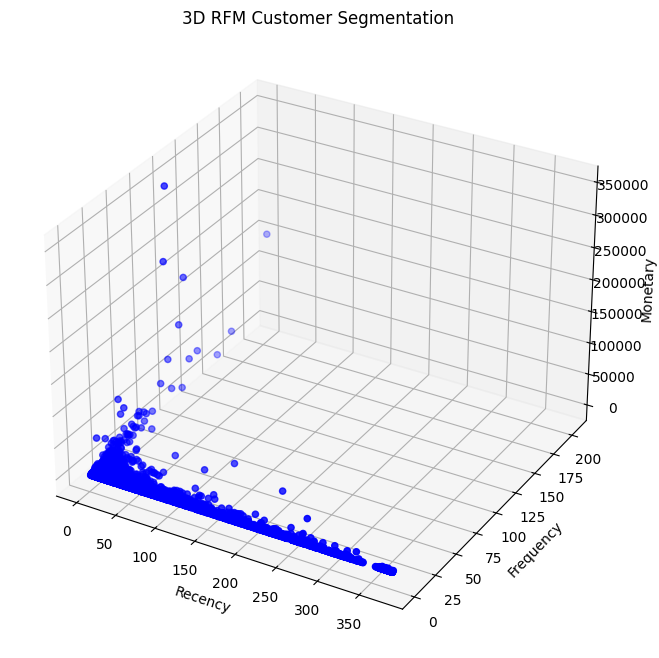

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], c='blue', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D RFM Customer Segmentation')
plt.show()